TASK 1:

In [1]:
import numpy as np
a = np.random.random((10,3))
print(a)

[[0.71880255 0.93741159 0.7857069 ]
 [0.08470927 0.68120589 0.22008913]
 [0.5624791  0.96711176 0.18794662]
 [0.90234401 0.5541229  0.23010139]
 [0.40750349 0.40805699 0.81311942]
 [0.5421042  0.95216893 0.94126073]
 [0.98563902 0.04307073 0.87851604]
 [0.14170517 0.5603987  0.92960221]
 [0.18182987 0.8888953  0.59985726]
 [0.79058284 0.87248915 0.94124255]]


In [2]:
for i in range(0, 10):
    near = a[i][0]
    for j in range(0,3):
        c = (0.5 - a[i][j]) 
        c = abs(c)
        if (c) < (0.5 - near):
            near = a[i][j]
    print ("nearest to 0.5 in ", i, "string is ", near)

nearest to 0.5 in  0 string is  0.7188025546495523
nearest to 0.5 in  1 string is  0.681205894548332
nearest to 0.5 in  2 string is  0.562479104748354
nearest to 0.5 in  3 string is  0.9023440080380687
nearest to 0.5 in  4 string is  0.4080569932220326
nearest to 0.5 in  5 string is  0.5421042022230348
nearest to 0.5 in  6 string is  0.9856390210535422
nearest to 0.5 in  7 string is  0.5603986954200938
nearest to 0.5 in  8 string is  0.599857261870391
nearest to 0.5 in  9 string is  0.7905828386928543


TASK 2:

In [3]:
import numpy as np
arr = np.random.random((6,6))
print(arr)

[[0.64041973 0.25691821 0.34876469 0.03477747 0.6416     0.44937071]
 [0.00921096 0.32392489 0.86195451 0.68552849 0.53841707 0.11448821]
 [0.5775671  0.14559219 0.03515236 0.50241951 0.92921255 0.9391895 ]
 [0.39216106 0.04325344 0.44509352 0.9318635  0.36500427 0.46300627]
 [0.36694869 0.87740728 0.70563986 0.45964971 0.53321133 0.50938003]
 [0.35058235 0.90162908 0.5403116  0.77610344 0.21661042 0.28735801]]


In [4]:
for i in range(0,6):
    s = 0
    for j in range(0,6):
        s += arr[i][j]
    minn = arr[0][i]
    for k in range(1,6):
        if arr[k][i] < minn:
            minn = arr[k][i]
        b = s / minn
    print("result for", i,"is", b)

result for 0 is 257.5031484817414
result for 1 is 58.573933664336124
result for 2 is 89.01629442086289
result for 3 is 75.92219505755492
result for 4 is 15.93753818607742
result for 5 is 26.83765384250529


TASK 3:

In [5]:
import numpy as np
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
maxx = 0
for i in range(0, 8):
    if (x[i] == 0):
        if (x[i+1] > maxx):
            maxx = x[i+1]
print("max after 0 is", maxx)

max after 0 is 5


TASK 4:

In [6]:
import numpy as np
y = np.ones(10)
p = np.array([0, 1, 2, 3, 5, 5, 5, 8])
for j in range(0,8):
    y[p[j]] += 1
print(y)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


TASK 5:

In [134]:
import numpy as np
def kmeans(obs, k_or_guess, iter = 1000, thresh = 1e-05):
    M = obs.shape[0]
    N = obs.shape[1] 
    codebook = obs[:k_or_guess,:] # new centroids of clusters
    centroids = np.zeros((k_or_guess,N)) # previous centroids
    distortion = M * N * k_or_guess * np.max(obs) ** 2 # new distortion
    dist = 0 # previous distortion
    obs = np.expand_dims(obs, axis = 1) # adding оf a new axis
    i = 0
    while np.abs(distortion - dist) > thresh and i < iter:
        centroids = codebook
        dist = distortion
        clust = np.argmin(((obs - codebook) ** 2).sum(axis = 2), axis = 1) # clusters's numbers for each element
        m = np.zeros(M * k_or_guess * N).reshape(M, k_or_guess, N)
        m[np.arange(M), clust] = (obs - codebook)[np.arange(M),clust] / np.bincount(clust)[clust].reshape(M, 1)
        codebook = centroids + m.sum(axis = 0)
        clust = np.argmin(((obs - codebook) ** 2).sum(axis = 2),axis = 1) 
        m = np.zeros(M * k_or_guess * N).reshape(M, k_or_guess, N)
        m[np.arange(M), clust] = (obs - codebook)[np.arange(M), clust]
        distortion = np.sqrt((m ** 2).sum(axis = 2)).sum(axis = 1).mean()
        i = i + 1
    return codebook, distortion

TASK 6:

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans
# data reading
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float) 

In [159]:
def num_clust(data, codebook): # points and their cluster's numbers
    k = len(codebook) # number of clusters
    i = np.arange(0, k) # indexes
    p = np.ones((k, len(data)))
    p[i] = np.arange(0, len(data))
    p = p.astype(int) # value type is int
    d1 = (data[p, 0] - codebook[i, 0].reshape(k, 1))**2
    d2 = (data[p, 1] - codebook[i, 1].reshape(k, 1))**2
    clust_num = ((d1 + d2)**(1/2)).argmin(axis = 0).astype(int)
    clusters = []
    for j in range(k):
        clusters.append(data[clust_num == j])
    return clusters

TEST 1: DEPENDENCE OF ANNUAL INCOME ON AGE

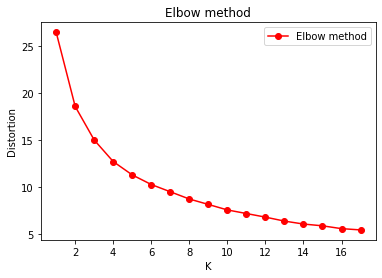

In [181]:
dist = []
K = range(1,18)
for k in K:
    dist.append(kmeans(data[:,[2,3]], k)[1])

plt.plot(K, dist, 'o-r', label='Elbow method')
plt.legend()
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow method')
plt.show()

OPTIMAL K = 3

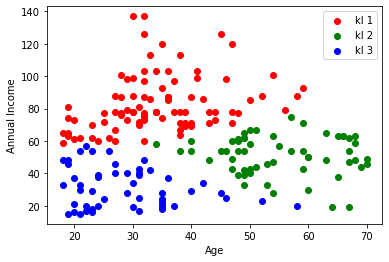

In [187]:
codebook, distortion = kmeans(data[:,[2,3]], 3)
clusters = num_clust(data[:,[2,3]], codebook)
plt.scatter(clusters[0][:,0], clusters[0][:,1], c='r', label='kl 1')
plt.scatter(clusters[1][:,0], clusters[1][:,1], c='g', label='kl 2')
plt.scatter(clusters[2][:,0], clusters[2][:,1], c='b', label='kl 3')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

TEST 2: DEPENDENCE OF SPENDING SCORE ON AGE

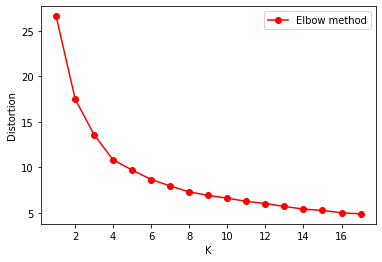

In [183]:
dist = []
K = range(1,18)
for k in K:
    dist.append(kmeans(data[:,[2,4]], k)[1])
    
plt.plot(K, dist, 'o-r', label='Elbow method')
plt.legend()
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

OPTIMAL K = 4

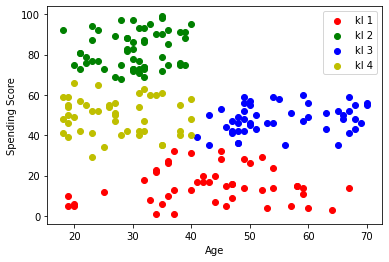

In [188]:
codebook, distortion = kmeans(data[:,[2,4]], 4)
clusters = num_clust(data[:,[2,4]], codebook)
plt.scatter(clusters[0][:,0], clusters[0][:,1], c='r', label='kl 1')
plt.scatter(clusters[1][:,0], clusters[1][:,1], c='g', label='kl 2')
plt.scatter(clusters[2][:,0], clusters[2][:,1], c='b', label='kl 3')
plt.scatter(clusters[3][:,0], clusters[3][:,1], c='y', label='kl 4')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

TEST 3: DEPENDENCE OF SPENDING SCORE ON ANNUAL INCOME

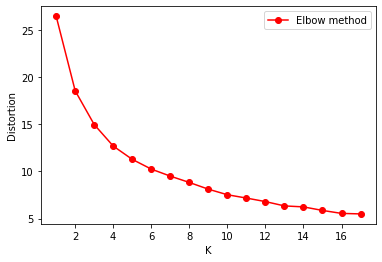

In [186]:
dist = []
K = range(1,18)
for k in K:
    dist.append(kmeans(data[:,[3,4]], k)[1])
    
plt.plot(K, distortions, 'o-r', label='Elbow method')
plt.legend()
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

OPTIMAL K = 5

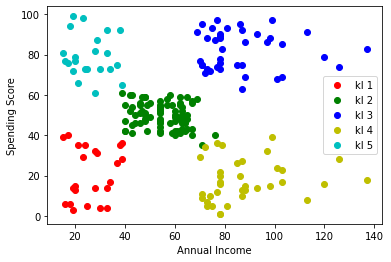

In [191]:
codebook, distortion = kmeans(data[:,[3,4]], 5)
clusters = num_clust(data[:,[3,4]], codebook)
plt.scatter(clusters[0][:,0], clusters[0][:,1], c='r', label='kl 1')
plt.scatter(clusters[1][:,0], clusters[1][:,1], c='g', label='kl 2')
plt.scatter(clusters[2][:,0], clusters[2][:,1], c='b', label='kl 3')
plt.scatter(clusters[3][:,0], clusters[3][:,1], c='y', label='kl 4')
plt.scatter(clusters[4][:,0], clusters[4][:,1], c='c', label='kl 5')
plt.legend()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()